In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv(r'C:\Users\pc\Downloads\credit_risk_analysis\credit_risk_dataset.csv')
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [4]:
df.shape

(32581, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.duplicated().sum()

165

In [7]:
#Removing Dulplicated rows from the dataset

In [8]:
df_redup = df.drop_duplicates()

In [9]:
df_redup.shape

(32416, 12)

In [10]:
# Evaluate Missing Values

In [11]:
def findmiss_in_percent(data):
    return round(data.isnull().sum()/data.shape[0] *100,2)

In [12]:
findmiss_in_percent(df_redup)

person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.74
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.55
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

In [13]:
# person_emp_length has 2.74% values missing and
#loan_int_rate has 9.55% values missing

In [14]:
#target value evaluation

In [15]:
df_redup['loan_status'].value_counts()

0    25327
1     7089
Name: loan_status, dtype: int64

In [16]:
# Evaluate each of the features that have missing values taking into cosideration effect on the target feature
# 25327 did not default and 7089 defaulted, hence dropping rows from the dataset will have an impact on the imbalanced target variable

In [17]:
def default_in_nan(data,featr,target):
    return data[data[featr].isnull()].groupby([target]).size()

In [18]:
features = ['person_emp_length','loan_int_rate']
default_in_nan(df_redup,features[0],'loan_status')

loan_status
0    606
1    281
dtype: int64

In [19]:
default_in_nan(df_redup,features[1],'loan_status')

loan_status
0    2454
1     641
dtype: int64

In [20]:
# 281 of the 7089 defaulters have missing value for person_emp_length. 
# This means it would have an impact dropping the rows with NAN hence we can opt to fillna

In [21]:
# 641 of the 7089 defaulters have missing value for loan_int_rate. 
# This means it would have an impact dropping the rows with NAN hence we can opt to fillna

In [22]:
df_redup.fillna(df_redup.mean(),inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_18712\668970249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_redup.fillna(df_redup.mean(),inplace=True)


In [23]:
df_redup.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [24]:
df_redup.shape

(32416, 12)

In [25]:
#Exploratory Data Analysis

In [26]:
df_redup.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

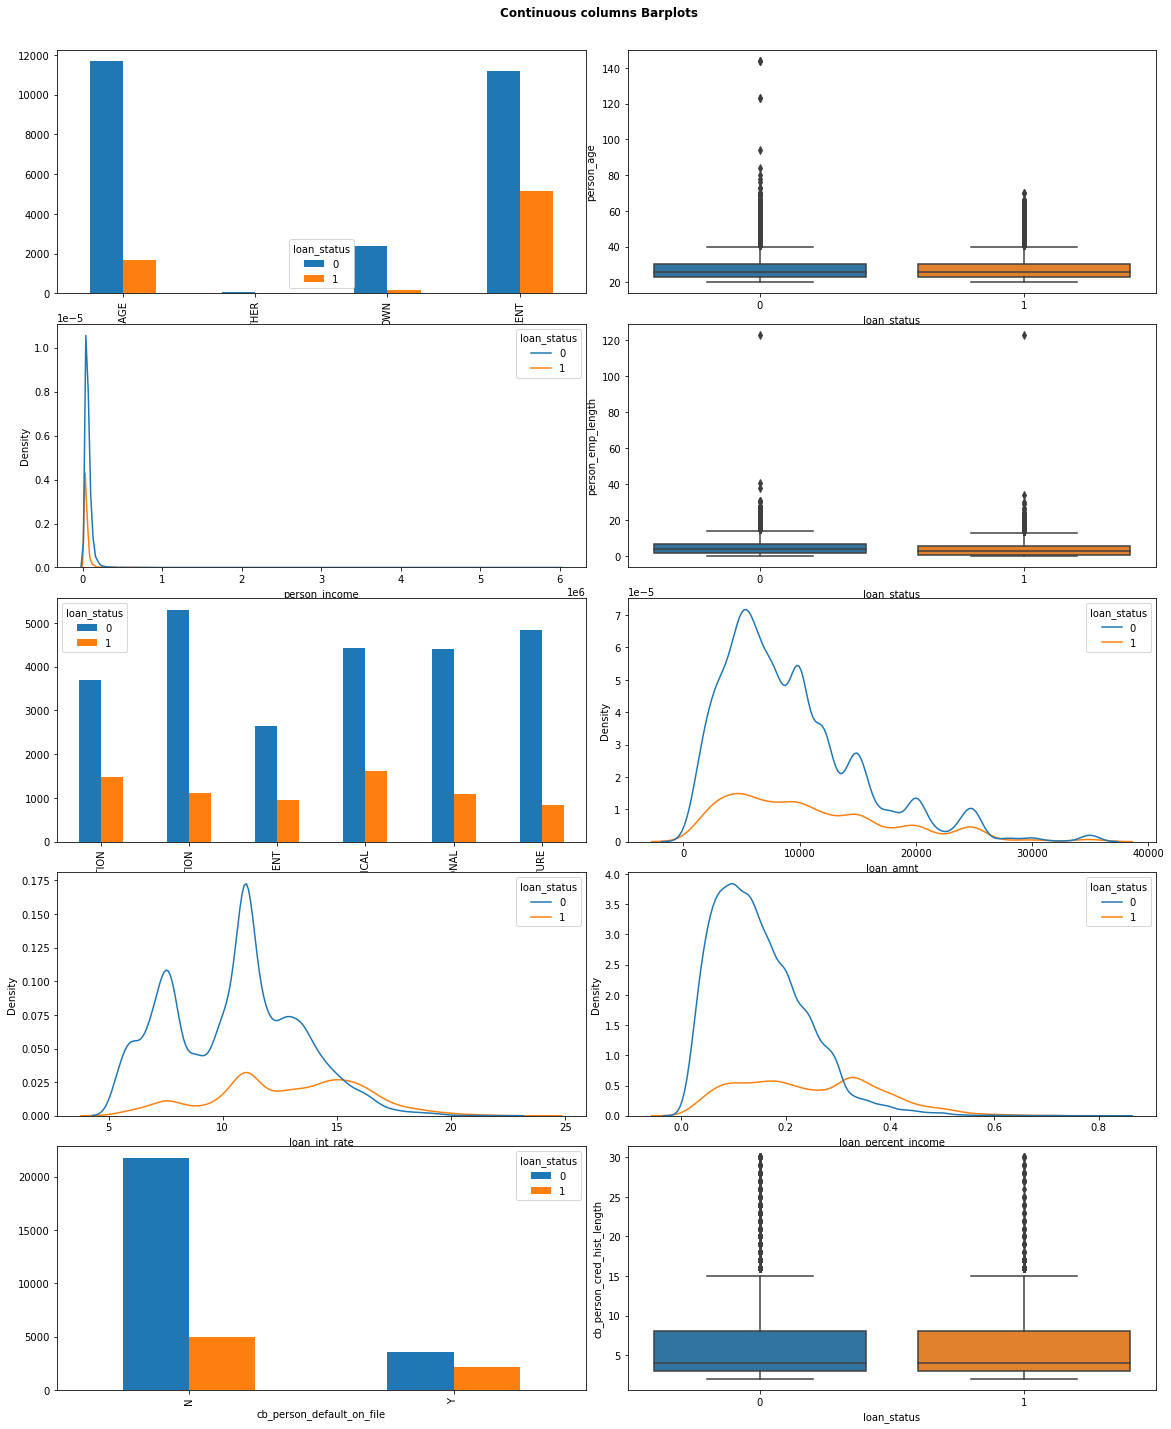

In [27]:
fig, axs = plt.subplots(5,2, figsize=(16,20))
# fig, axs = plt.subplots(5,2, figsize=(16,20))
# --General title--
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Continuous columns Barplots', fontweight='bold', fontfamily='sans-serif');

crostab = pd.crosstab(df_redup['person_home_ownership'],df_redup.loan_status);
crostab.plot(kind='bar',ax=axs[0,0]);
sns.boxplot(df_redup.loan_status,df_redup.person_age,ax=axs[0,1]);
sns.kdeplot(df_redup.person_income,hue = df_redup.loan_status, ax=axs[1,0]);
sns.boxplot(df_redup.loan_status,df_redup.person_emp_length,ax=axs[1,1]);
crostab = pd.crosstab(df_redup['loan_intent'],df_redup.loan_status);
crostab.plot(kind='bar',ax=axs[2,0]);
sns.kdeplot(df_redup.loan_amnt,hue = df_redup.loan_status, ax=axs[2,1]);
sns.kdeplot(df_redup.loan_int_rate, hue = df_redup.loan_status,ax=axs[3,0]);
sns.kdeplot(df_redup.loan_percent_income,hue=df_redup.loan_status,ax=axs[3,1]);
crostab = pd.crosstab(df_redup['cb_person_default_on_file'],df_redup.loan_status);
crostab.plot(kind='bar',ax=axs[4,0]);
sns.boxplot(df_redup.loan_status,df_redup.cb_person_cred_hist_length,ax=axs[4,1]);

In [28]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
le = LabelEncoder()

df_redup.loc[:,'person_age'] = sc.fit_transform(np.array(df_redup.loc[:,'person_age']).reshape(-1,1))
df_redup.loc[:,'person_income'] = sc.fit_transform(np.array(df_redup.person_income).reshape(-1,1))
df_redup.loc[:,'person_emp_length'] = sc.fit_transform(np.array(df_redup.person_emp_length).reshape(-1,1))
df_redup.loc[:,'loan_amnt'] = sc.fit_transform(np.array(df_redup.loan_amnt).reshape(-1,1))
df_redup.loc[:,'loan_int_rate'] = sc.fit_transform(np.array(df_redup.loan_int_rate).reshape(-1,1))
df_redup.loc[:,'loan_percent_income'] = sc.fit_transform(np.array(df_redup.loan_percent_income).reshape(-1,1))
df_redup.loc[:,'cb_person_cred_hist_length'] = sc.fit_transform(np.array(df_redup.cb_person_cred_hist_length).reshape(-1,1))

df_redup.loc[:,'loan_intent'] = le.fit_transform(np.array(df_redup.loan_intent).reshape(-1,1))
df_redup.loc[:,'loan_grade'] = le.fit_transform(np.array(df_redup.loan_grade).reshape(-1,1))
df_redup.loc[:,'person_home_ownership'] = le.fit_transform(np.array(df_redup.person_home_ownership).reshape(-1,1))
df_redup.loc[:,'cb_person_default_on_file'] = le.fit_transform(np.array(df_redup.cb_person_default_on_file).reshape(-1,1))

df_redup.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_18712\967217730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_redup.loc[:,'person_age'] = sc.fit_transform(np.array(df_redup.loc[:,'person_age']).reshape(-1,1))
C:\Users\pc\AppData\Local\Temp\ipykernel_18712\967217730.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_redup.loc[:,'person_income'] = sc.fit_transform(np.array(df_redup.person_income).reshape(-1,1))
C:\Users\pc\AppData\Local\Temp\ipykernel_18712\967217730.py:7: SettingWithCopyWarning: 
A val

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,-0.904471,-0.114354,3,28.913989,4,3,4.018287,1.622688,1,3.929865,1,-0.692614
1,-1.061852,-0.910941,2,0.051241,1,1,-1.359219,0.039810,0,-0.657707,0,-0.938982
2,-0.432327,-0.910941,0,-0.927157,3,2,-0.647491,0.600953,1,3.742617,0,-0.692614
3,-0.747089,-0.009540,3,-0.193358,3,2,4.018287,1.366443,1,3.368121,0,-0.938982
4,-0.589708,-0.188530,3,0.785040,3,2,4.018287,1.055058,1,3.555369,1,-0.446246


In [29]:
x = df_redup.drop('loan_status', axis = 1)
y = df_redup.loan_status

In [30]:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, train_size =0.75)

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
print('Accuracy of the train dataset:',accuracy_score(model.predict(X_train),y_train))
print('Accuracy of the test dataset:',accuracy_score(model.predict(X_test),y_test))

Accuracy of the train dataset: 0.9999588680487003
Accuracy of the test dataset: 0.9320088845014808


In [33]:
print(classification_report(model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      6824
           1       0.71      0.96      0.82      1280

    accuracy                           0.93      8104
   macro avg       0.85      0.94      0.89      8104
weighted avg       0.95      0.93      0.94      8104



In [34]:
# Saving Machine learning model using joblib

In [35]:
import joblib
filename = 'C:/Users/pc/dev/mlops/env/credit_risk_analysis_model.sav'
gnb = joblib.dump(model,filename)